In [ ]:
import os, sys, time, datetime, numpy as np
import matplotlib.pyplot as plt
import tikzplotlib as tkz
from tqdm.autonotebook import tqdm

if os.path.basename(os.getcwd()) == "notebooks":
    os.chdir("..")
print(f"Current path: {os.getcwd()}")
sys.path.append('./')

from onlinelearning.agent import IGPUCB
from environments import ContinuousNoiseEnv

Current path: /Users/marcomussi/git/HetGaussianProcesses


/var/folders/4z/mvrgdd8923g26xd4nhj_0gdh0000gn/T/ipykernel_66373/2277758969.py:3: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
horizon = 1000
kernel_L = 100
sigma_sq = 0
n_runs = 5
B = 1
delta = 1 / horizon

n_actions_lst = [10, 20, 30, 40, 50, 70, 100]

HET = "\\hetgp"
HET_EFF = "\\hetgpeff"
GP = "\\homgp"
GP_EFF = "\\homgpeff"
alg_lst = [HET, GP_EFF]

actions = np.zeros((len(alg_lst), len(n_actions_lst), n_runs, horizon))
rewards = np.zeros((len(alg_lst), len(n_actions_lst), n_runs, horizon))
runningtime = np.zeros((len(alg_lst), len(n_actions_lst), n_runs, horizon))

for run_i in range(n_runs):
    
    print(f"Starting run {run_i+1} of {n_runs}.")

    for n_actions_i, n_actions in enumerate(n_actions_lst):

        available_actions = np.linspace(0, 1, n_actions).reshape(n_actions, 1)
        
        for alg_i, alg in enumerate(alg_lst):
        
            env = ContinuousNoiseEnv(sigma_sq, seed=run_i)
            
            if alg == GP:
                agent = IGPUCB(n_actions, 1, available_actions, kernel_L, sigma_sq, B, delta, het=False, incr_update=False)
            elif alg == GP_EFF:
                agent = IGPUCB(n_actions, 1, available_actions, kernel_L, sigma_sq, B, delta, het=False, incr_update=True)
            elif alg == HET:
                agent = IGPUCB(n_actions, 1, available_actions, kernel_L, sigma_sq, B, delta, het=True, incr_update=False)
            elif alg == HET_EFF:
                agent = IGPUCB(n_actions, 1, available_actions, kernel_L, sigma_sq, B, delta, het=True, incr_update=True)
            else:
                raise NotImplementedError(f"{alg} not available")
            
            start = time.time()

            for t in tqdm(range(horizon)):
                
                actions[alg_i, n_actions_i, run_i, t] = agent.pull()
                rewards[alg_i, n_actions_i, run_i, t] = env.step(actions[alg_i, n_actions_i, run_i, t])
                agent.update(rewards[alg_i, n_actions_i, run_i, t])
                runningtime[alg_i, n_actions_i, run_i, t] = time.time() - start

inst_regret = 1 - rewards # max is always 1
inst_pseudo_regret = 1 - env.get_expected(actions) # max is always 1

cum_regret = np.cumsum(inst_regret, axis=3)
cum_pseudo_regret = np.cumsum(inst_pseudo_regret, axis=3)

Starting run 1 of 10.


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Starting run 2 of 10.


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Starting run 3 of 10.


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Starting run 4 of 10.


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Starting run 5 of 10.


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Starting run 6 of 10.


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Starting run 7 of 10.


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Starting run 8 of 10.


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Starting run 9 of 10.


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Starting run 10 of 10.


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

In [15]:
dateformat = "(%Y-%b-%d %Ih%Mm%p)"
save_path_approx = "results/online/approximation/"
save_path_runningtime = "results/online/runningtime/"
save_path_pareto = "results/online/pareto/"

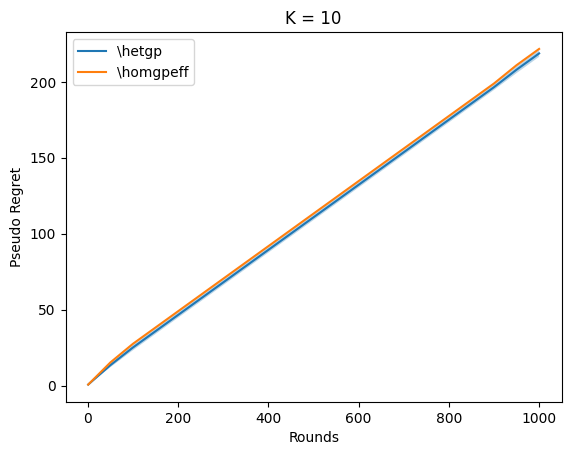

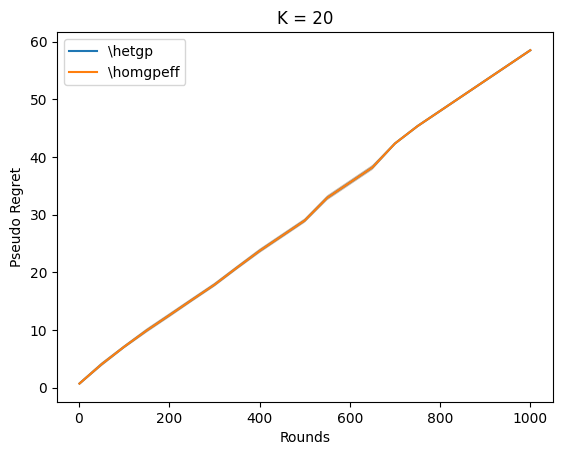

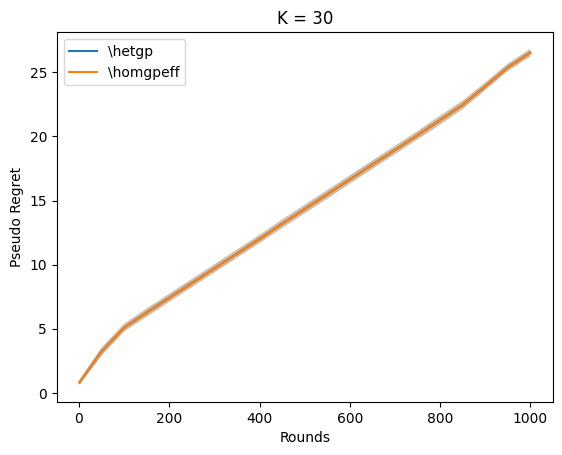

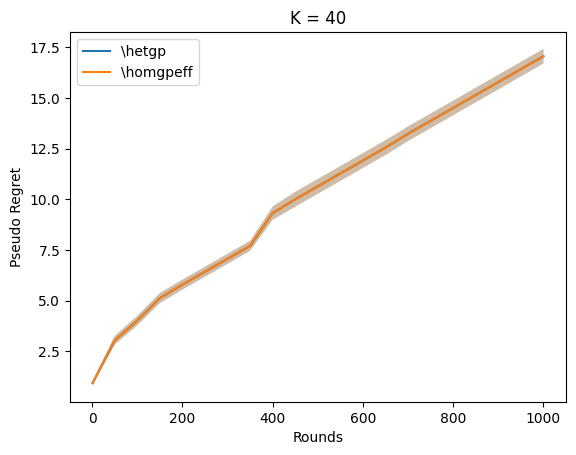

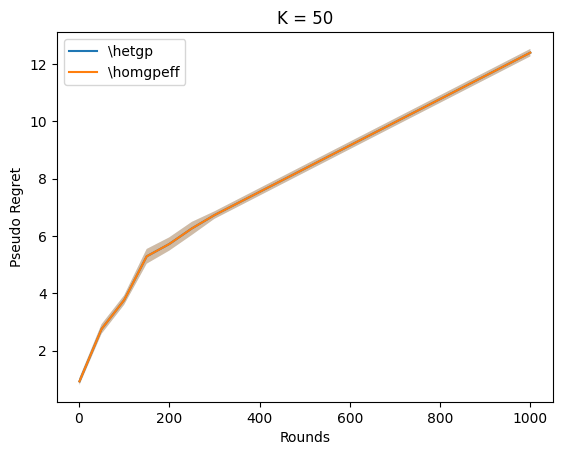

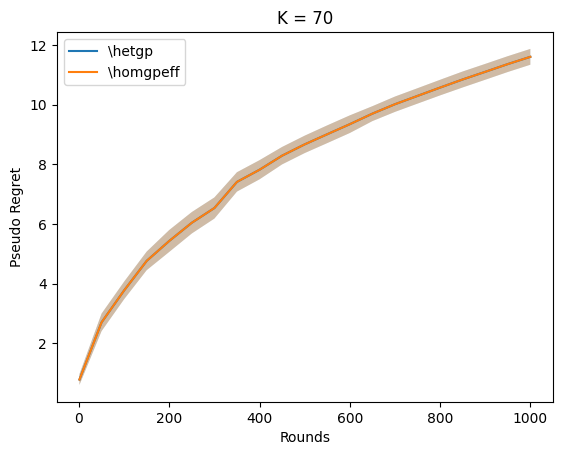

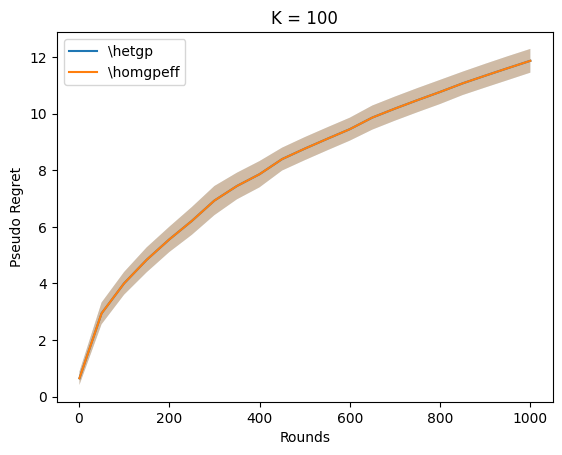

In [32]:
ci95 = lambda std_val : 1.96 * std_val / np.sqrt(n_runs)

horizon_plt = np.linspace(1, horizon, 21, dtype=int)

for n_actions_i, n_actions in enumerate(n_actions_lst):

    plt.figure()

    for alg_i, alg in enumerate(alg_lst):
        
        mean_aux_pseudo = np.mean(cum_pseudo_regret[alg_i, n_actions_i, :, :], axis=0)
        std_aux_pseudo = np.std(cum_pseudo_regret[alg_i, n_actions_i, :, :], axis=0)
        plt.plot(horizon_plt, mean_aux_pseudo[horizon_plt-1], label=alg)
        plt.fill_between(horizon_plt, mean_aux_pseudo[horizon_plt-1] - ci95(std_aux_pseudo[horizon_plt-1]), mean_aux_pseudo[horizon_plt-1] + ci95(std_aux_pseudo[horizon_plt-1]), alpha=0.3)

    plt.legend()
    plt.xlabel("Rounds")
    plt.ylabel("Pseudo Regret")
    plt.title(f"K = {n_actions}")
    complete_path_approx = f"{save_path_approx}regretplot_Z{n_actions}_L{kernel_L}_horizon{horizon}_{datetime.datetime.now().strftime(dateformat)}"
    plt.savefig(f"{complete_path_approx}.jpg")
    tkz.save(f"{complete_path_approx}.tex")

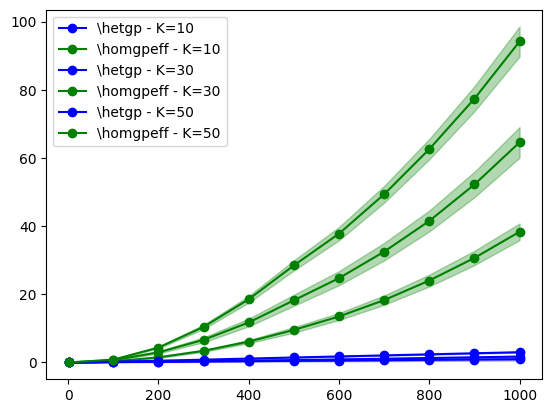

In [ ]:
colors = ["blue", "green", "orange", "magenta"]
linestyles = [
    (0, (5, 5)),                  # dashed classico
    (0, (10, 5)),                 # dashed lungo
    (0, (1, 5)),                  # dotted largo
    (0, (3, 5, 1, 5)),            # dash-dot
    (0, (5, 2, 1, 2)),            # dash-dot fitto
    (0, (8, 2, 2, 2, 2, 2)),      # dash-dot-dot
    (0, (8, 2, 8, 2, 2, 2, 2, 2)) # dash-dash-dot-dot
]
horizon_plt = np.linspace(1, horizon, 11, dtype=int)

actions_plt_lst = [10, 20, 30]

plt.figure()
for n_actions_i, n_actions in enumerate(actions_plt_lst):
    for alg_i, alg in enumerate(alg_lst):
        mean_aux = np.mean(runningtime[alg_i, n_actions_i, :, :], axis=0)
        std_aux = np.std(runningtime[alg_i, n_actions_i, :, :], axis=0)
        plt.plot(horizon_plt, mean_aux[horizon_plt-1], "o-", color=colors[alg_i], label=f"{alg} - K={n_actions}")
        plt.fill_between(horizon_plt, mean_aux[horizon_plt-1] - ci95(std_aux[horizon_plt-1]), mean_aux[horizon_plt-1] + ci95(std_aux[horizon_plt-1]), color=colors[alg_i], alpha=0.3)
plt.legend(loc="upper left")
complete_path_runningtime = f"{save_path_runningtime}runningtimeplot_Zlst{actions_plt_lst}_L{kernel_L}_horizon{horizon}_{datetime.datetime.now().strftime(dateformat)}"
plt.savefig(f"{complete_path_runningtime}.jpg")
tkz.save(f"{complete_path_runningtime}.tex")

<Figure size 640x480 with 0 Axes>

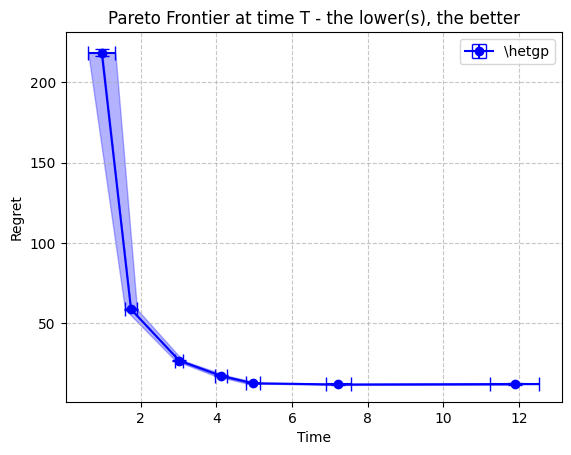

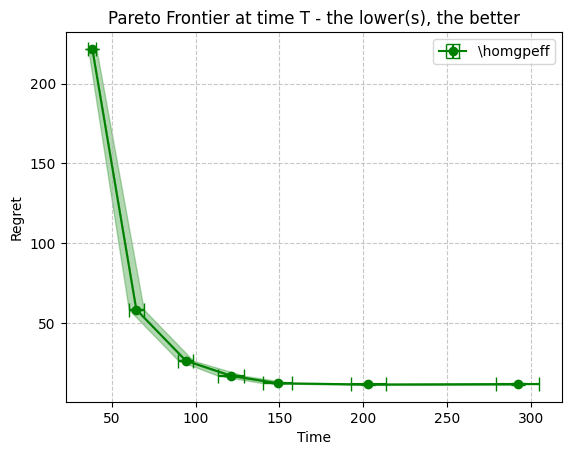

In [23]:
plt.figure()

for alg_i, alg in enumerate(alg_lst):

    time_means = np.mean(runningtime[alg_i, :, :, -1], axis=1)
    time_stds = np.std(runningtime[alg_i, :, :, -1], axis=1)
    cum_regret_means = np.mean(cum_pseudo_regret[alg_i, :, :, -1], axis=1)
    cum_regret_stds = np.std(cum_pseudo_regret[alg_i, :, :, -1], axis=1)

    plt.figure()

    plt.errorbar(time_means, cum_regret_means, xerr=ci95(time_stds), yerr=ci95(cum_regret_stds), 
                 fmt='o-', color=colors[alg_i], ecolor=colors[alg_i], capsize=5, label=alg)

    # Smart fill between using extreme points
    time_lower = time_means - ci95(time_stds)
    time_upper = time_means + ci95(time_stds)
    regret_lower = cum_regret_means - ci95(cum_regret_stds)
    regret_upper = cum_regret_means + ci95(cum_regret_stds)

    plt.fill_betweenx(cum_regret_means, time_lower, time_upper, color=colors[alg_i], alpha=0.3)
    plt.fill_between(time_means, regret_lower, regret_upper, color=colors[alg_i], alpha=0.3)

    plt.legend()
    plt.title("Pareto Frontier at time T - the lower(s), the better")
    plt.xlabel("Time")
    plt.ylabel("Regret")
    plt.grid(True, linestyle='--', alpha=0.7)
    complete_path_pareto = f"{save_path_pareto}pareto_alg{alg}_Zlst{n_actions_lst}_L{kernel_L}_horizon{horizon}_{datetime.datetime.now().strftime(dateformat)}"
    plt.savefig(f"{complete_path_pareto}.jpg")
    tkz.save(f"{complete_path_pareto}.tex")